In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [2]:
df_produtos = pd.read_csv("../data/processados/produtos_fundos.csv")

In [3]:
df_produtos.head()

,ProdutoId,NomeInvestimento__c,DescricaoCarencia__c,DescricaoCotizacaoResgate__c,DescricaoCotizacaoResgate__c.1,DescricaoTributacaoProduto__c,DiasUteisParaResgate__c,FamiliaCarteira__c,FiltroValorMinimo__c,RentabilidadeAno__c,ResgateDias__c,RiscoAtivo__c,SaldoMinimoPermanencia__c,Inativo__c
0,a0W3u000009PBevEAG,EQUITAS SELECTION MÃO AMIGA FIC AÇÕES,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,5000.0,4.001300,Qualquer dia,5.0,1000.0,False
1,a0W3u000009PBfAEAW,EQUITAS SELECTION FIC FIA,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,5000.0,1.334016,Qualquer dia,5.0,1000.0,False
2,a0W3u000009PBlwEAG,TRIGONO FLAGSHIP SMALL CAPS FIC FIA,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,500.0,11.323087,Qualquer dia,5.0,500.0,False
3,a0W3u000009PBm6EAG,TRIGONO VERBIER FIA,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,500.0,8.178073,Qualquer dia,5.0,500.0,False
4,a0W3u000009PCgiEAG,SQUADRA LONG-BIASED FIC FIA,Qualquer dia,60 dias corridos,60 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",62 dias,Renda Variável,5000.0,6.945695,Qualquer dia,5.0,5000.0,False


In [4]:
df_produtos.columns

Index(['ProdutoId', 'NomeInvestimento__c', 'DescricaoCarencia__c',
       'DescricaoCotizacaoResgate__c', 'DescricaoCotizacaoResgate__c.1',
       'DescricaoTributacaoProduto__c', 'DiasUteisParaResgate__c',
       'FamiliaCarteira__c', 'FiltroValorMinimo__c', 'RentabilidadeAno__c',
       'ResgateDias__c', 'RiscoAtivo__c', 'SaldoMinimoPermanencia__c',
       'Inativo__c'],
      dtype='object')

In [5]:
df_ml = df_produtos[['FamiliaCarteira__c', 'RiscoAtivo__c', 'ProdutoId']]

In [6]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_ml.isnull().sum()

FamiliaCarteira__c    0
RiscoAtivo__c         0
ProdutoId             0
dtype: int64

In [8]:
df_ml.shape

(282, 3)

In [9]:
cluster_model = ClusterModel(df_ml.loc[:, df_ml.columns != 'ProdutoId'],do_pca=False)

In [10]:
clusters, model = cluster_model.dbscan()

In [11]:
clusters.head()

,FamiliaCarteira__c,RiscoAtivo__c,cluster
0,Renda Variável,5.0,0
1,Renda Variável,5.0,0
2,Renda Variável,5.0,0
3,Renda Variável,5.0,0
4,Renda Variável,5.0,0


In [12]:
df_merged = clusters.merge(df_ml[['ProdutoId']], left_index=True, right_index=True)

In [13]:
df_merged.to_csv("../data/processados/produto_fundos_final.csv", index=False)

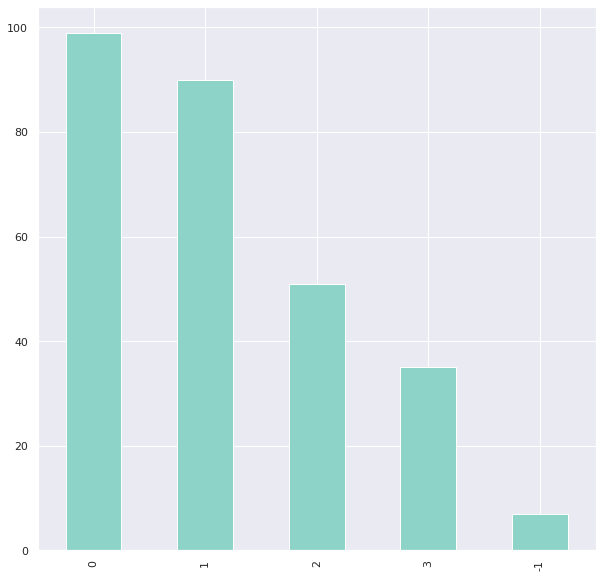

In [56]:
plt.figure(figsize=(10,10))
clusters['cluster'].value_counts().plot(kind='bar')

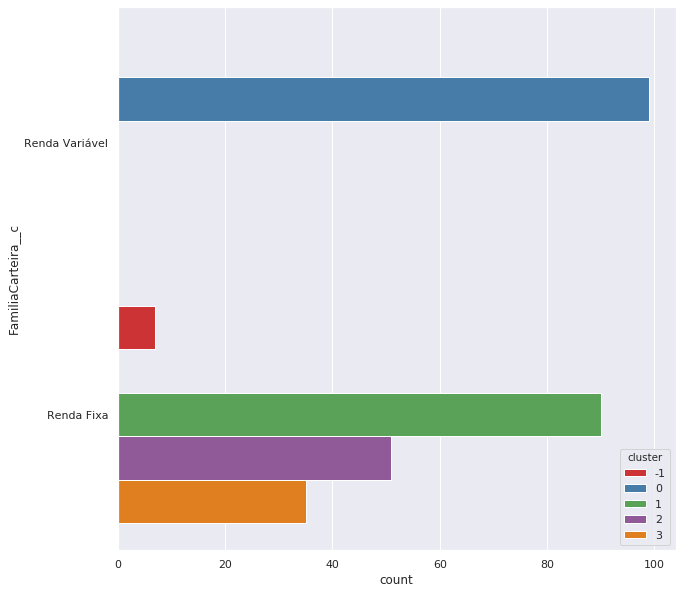

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(y ="FamiliaCarteira__c", hue="cluster", data=clusters, palette='Set1')

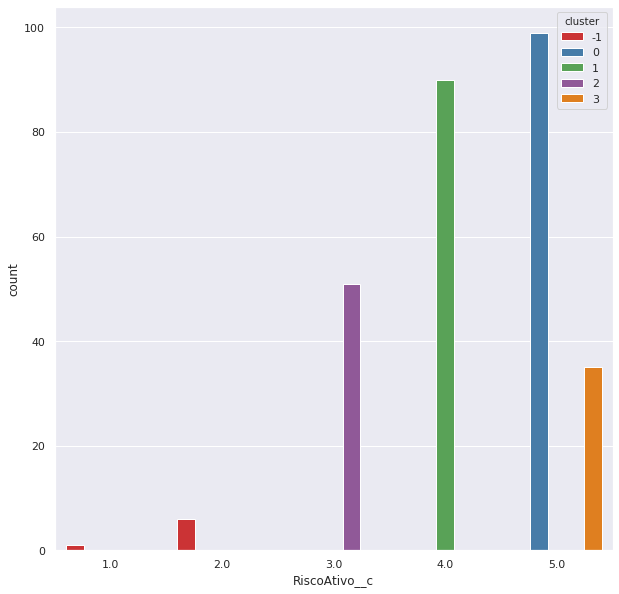

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x="RiscoAtivo__c", hue="cluster", data=clusters, palette='Set1')

In [62]:
clusters.query("cluster == 3")

,DescricaoCarencia__c,FamiliaCarteira__c,RiscoAtivo__c,cluster
24,Qualquer dia,Renda Fixa,5.0,3
32,Qualquer dia,Renda Fixa,5.0,3
48,Qualquer dia,Renda Fixa,5.0,3
49,Qualquer dia,Renda Fixa,5.0,3
57,Qualquer dia,Renda Fixa,5.0,3
58,Qualquer dia,Renda Fixa,5.0,3
69,Qualquer dia,Renda Fixa,5.0,3
77,Qualquer dia,Renda Fixa,5.0,3
86,Qualquer dia,Renda Fixa,5.0,3
90,Qualquer dia,Renda Fixa,5.0,3
